,Ca_salicilico,v_da_hija,V_agua,Absorbancia
0,10,1,9,0.1
1,20,2,8,0.2
2,40,4,6,0.4
3,60,6,4,0.6
4,80,8,2,0.8


,Cao_salicilico,v_da_hija,V_org,Absorbancia
0,10,1,9,0.1
1,20,2,8,0.2
2,40,4,6,0.4
3,60,6,4,0.6
4,80,8,2,0.8


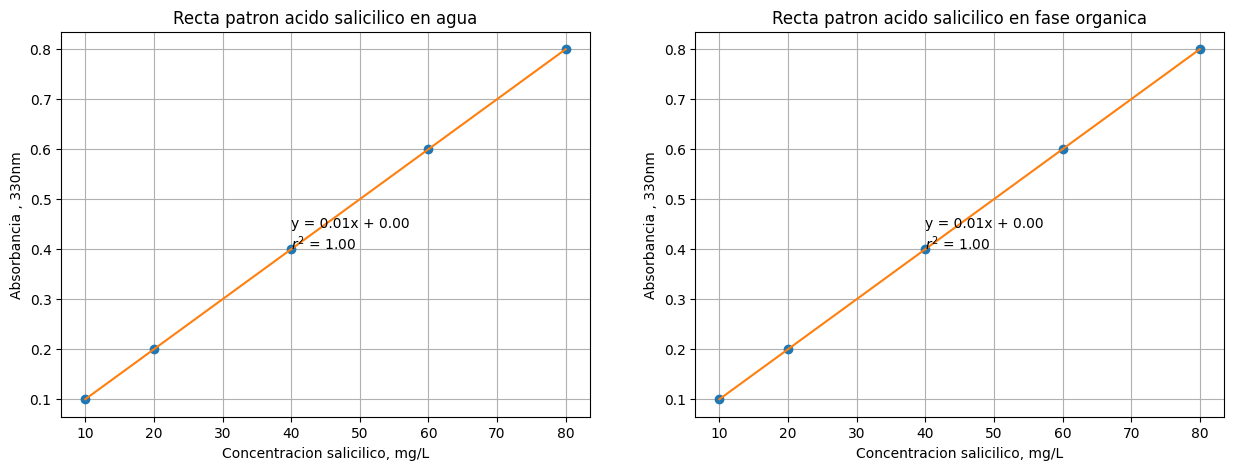

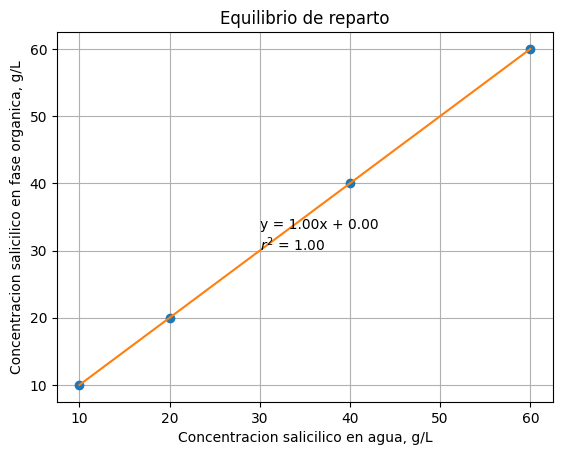

,Sistemas,V.d.madre ml,V agua ml,V.d.org ml,Abs_acu,Abs_org,CV g/L,CL g/L
0,0.2,5.0,20.0,20,0.1,0.1,10.0,10.0
1,0.3,7.5,17.5,20,0.2,0.2,20.0,20.0
2,0.4,10.0,15.0,20,0.4,0.4,40.0,40.0
3,0.5,12.5,12.5,20,0.6,0.6,60.0,60.0


In [14]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from IPython.display import display
from scipy.stats import linregress

# Fase acuosa

Ca_salicilico = np.array([10,20,40,60,80]) # mg/L
v_da_hija = np.array([1,2,4,6,8]) # mL
V_agua = np.array([9,8,6,4,2]) # mL
Absorbancia = np.array([0.1,0.2,0.4,0.6,0.8]) # Absorbancia

df_acuosa = pd.DataFrame({'Ca_salicilico': Ca_salicilico, 'v_da_hija': v_da_hija, 'V_agua': V_agua, 'Absorbancia': Absorbancia})
display(df_acuosa)

# Fase orgánica

Cao_salicilico = np.array([10,20,40,60,80]) # mg/L
v_da_hija = np.array([1,2,4,6,8]) # mL
V_org = np.array([9,8,6,4,2]) # mL
Absorbancia = np.array([0.1,0.2,0.4,0.6,0.8]) # Absorbancia
slope1, intercept1, r_value1, p_value1, std_err1 = linregress(Ca_salicilico, Absorbancia)
slope2, intercept2, r_value2, p_value2, std_err2 = linregress(Cao_salicilico, Absorbancia)
plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
plt.plot(Ca_salicilico, Absorbancia, 'o')
plt.plot(Ca_salicilico, slope1*Ca_salicilico + intercept1)
plt.title('Recta patron acido salicilico en agua')
plt.xlabel('Concentracion salicilico, mg/L')
plt.ylabel('Absorbancia , 330nm')
plt.text(max(Ca_salicilico)/2, max(Absorbancia)/2, 'y = {0:.2f}x + {1:.2f}\n$r^2$ = {2:.2f}'.format(slope1, intercept1, r_value1**2))
plt.grid()

plt.subplot(1,2,2)
plt.plot(Cao_salicilico, Absorbancia, 'o')
plt.plot(Cao_salicilico, slope2*Cao_salicilico + intercept2)
plt.title('Recta patron acido salicilico en fase organica')
plt.xlabel('Concentracion salicilico, mg/L')
plt.ylabel('Absorbancia , 330nm')
plt.text(max(Cao_salicilico)/2, max(Absorbancia)/2, 'y = {0:.2f}x + {1:.2f}\n$r^2$ = {2:.2f}'.format(slope2, intercept2, r_value2**2))
plt.grid()

df1 = pd.DataFrame({'Cao_salicilico': Cao_salicilico, 'v_da_hija': v_da_hija, 'V_org': V_org, 'Absorbancia': Absorbancia})
display(df1)

# equilibrio de reparto

Sistemas = np.array([0.2,0.3,0.4,0.5]) # g/L
dmadre = np.array([5,7.5,10,12.5]) # mL
V_agua_reparto = np.array([20,17.5,15,12.5]) # mL
V_org_reparto = np.array([20,20,20,20]) # mL
Abs_org = np.array([0.1,0.2,0.4,0.6]) # Absorbancia
Co = Abs_org / slope2
Abs_acu = np.array([0.1,0.2,0.4,0.6]) # Absorbancia
Ca = Abs_acu / slope1

result = linregress(Ca, Co)
kd = result.slope
df3 = pd.DataFrame({'Sistemas': Sistemas, 'V.d.madre ml': dmadre, 'V agua ml': V_agua_reparto, 'V.d.org ml': V_org_reparto, 'Abs_acu': Abs_acu, 'Abs_org': Abs_org, 'CV g/L': Ca, 'CL g/L': Co})

plt.figure()
plt.plot(Ca, Co, 'o')
plt.plot(Ca, result.slope*Ca + result.intercept)
plt.title('Equilibrio de reparto')
plt.xlabel('Concentracion salicilico en agua, g/L')
plt.ylabel('Concentracion salicilico en fase organica, g/L')
plt.text(max(Ca)/2, max(Co)/2, 'y = {0:.2f}x + {1:.2f}\n$r^2$ = {2:.2f}'.format(result.slope, result.intercept, result.rvalue**2))
plt.grid()
plt.show()
display(df3)